# <p style="background-color:#F8C1EE; font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 15px 50px;">Text EDA 🔍</p>

In [16]:
%%capture

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import json
from tqdm import tqdm
tqdm.pandas()

from nltk.corpus import stopwords
from unidecode import unidecode

import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


STOPWORDS = set(stopwords.words('english'))

import re

import seaborn as sns

from IPython.display import display, Markdown, Latex

## Load Dataset

In [5]:
data = pd.read_csv('../../data/text/train.csv')

## Basic Exploration

In [7]:
display(data.head())
data.info()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
for col in data.columns:
    print(f'We have {len(list(set(data[col].values)))} unique values in {col}')

We have 7613 unique values in id
We have 222 unique values in keyword
We have 3342 unique values in location
We have 7503 unique values in text
We have 2 unique values in target


#### Target Distribution

0    4342
1    3271
Name: target, dtype: int64

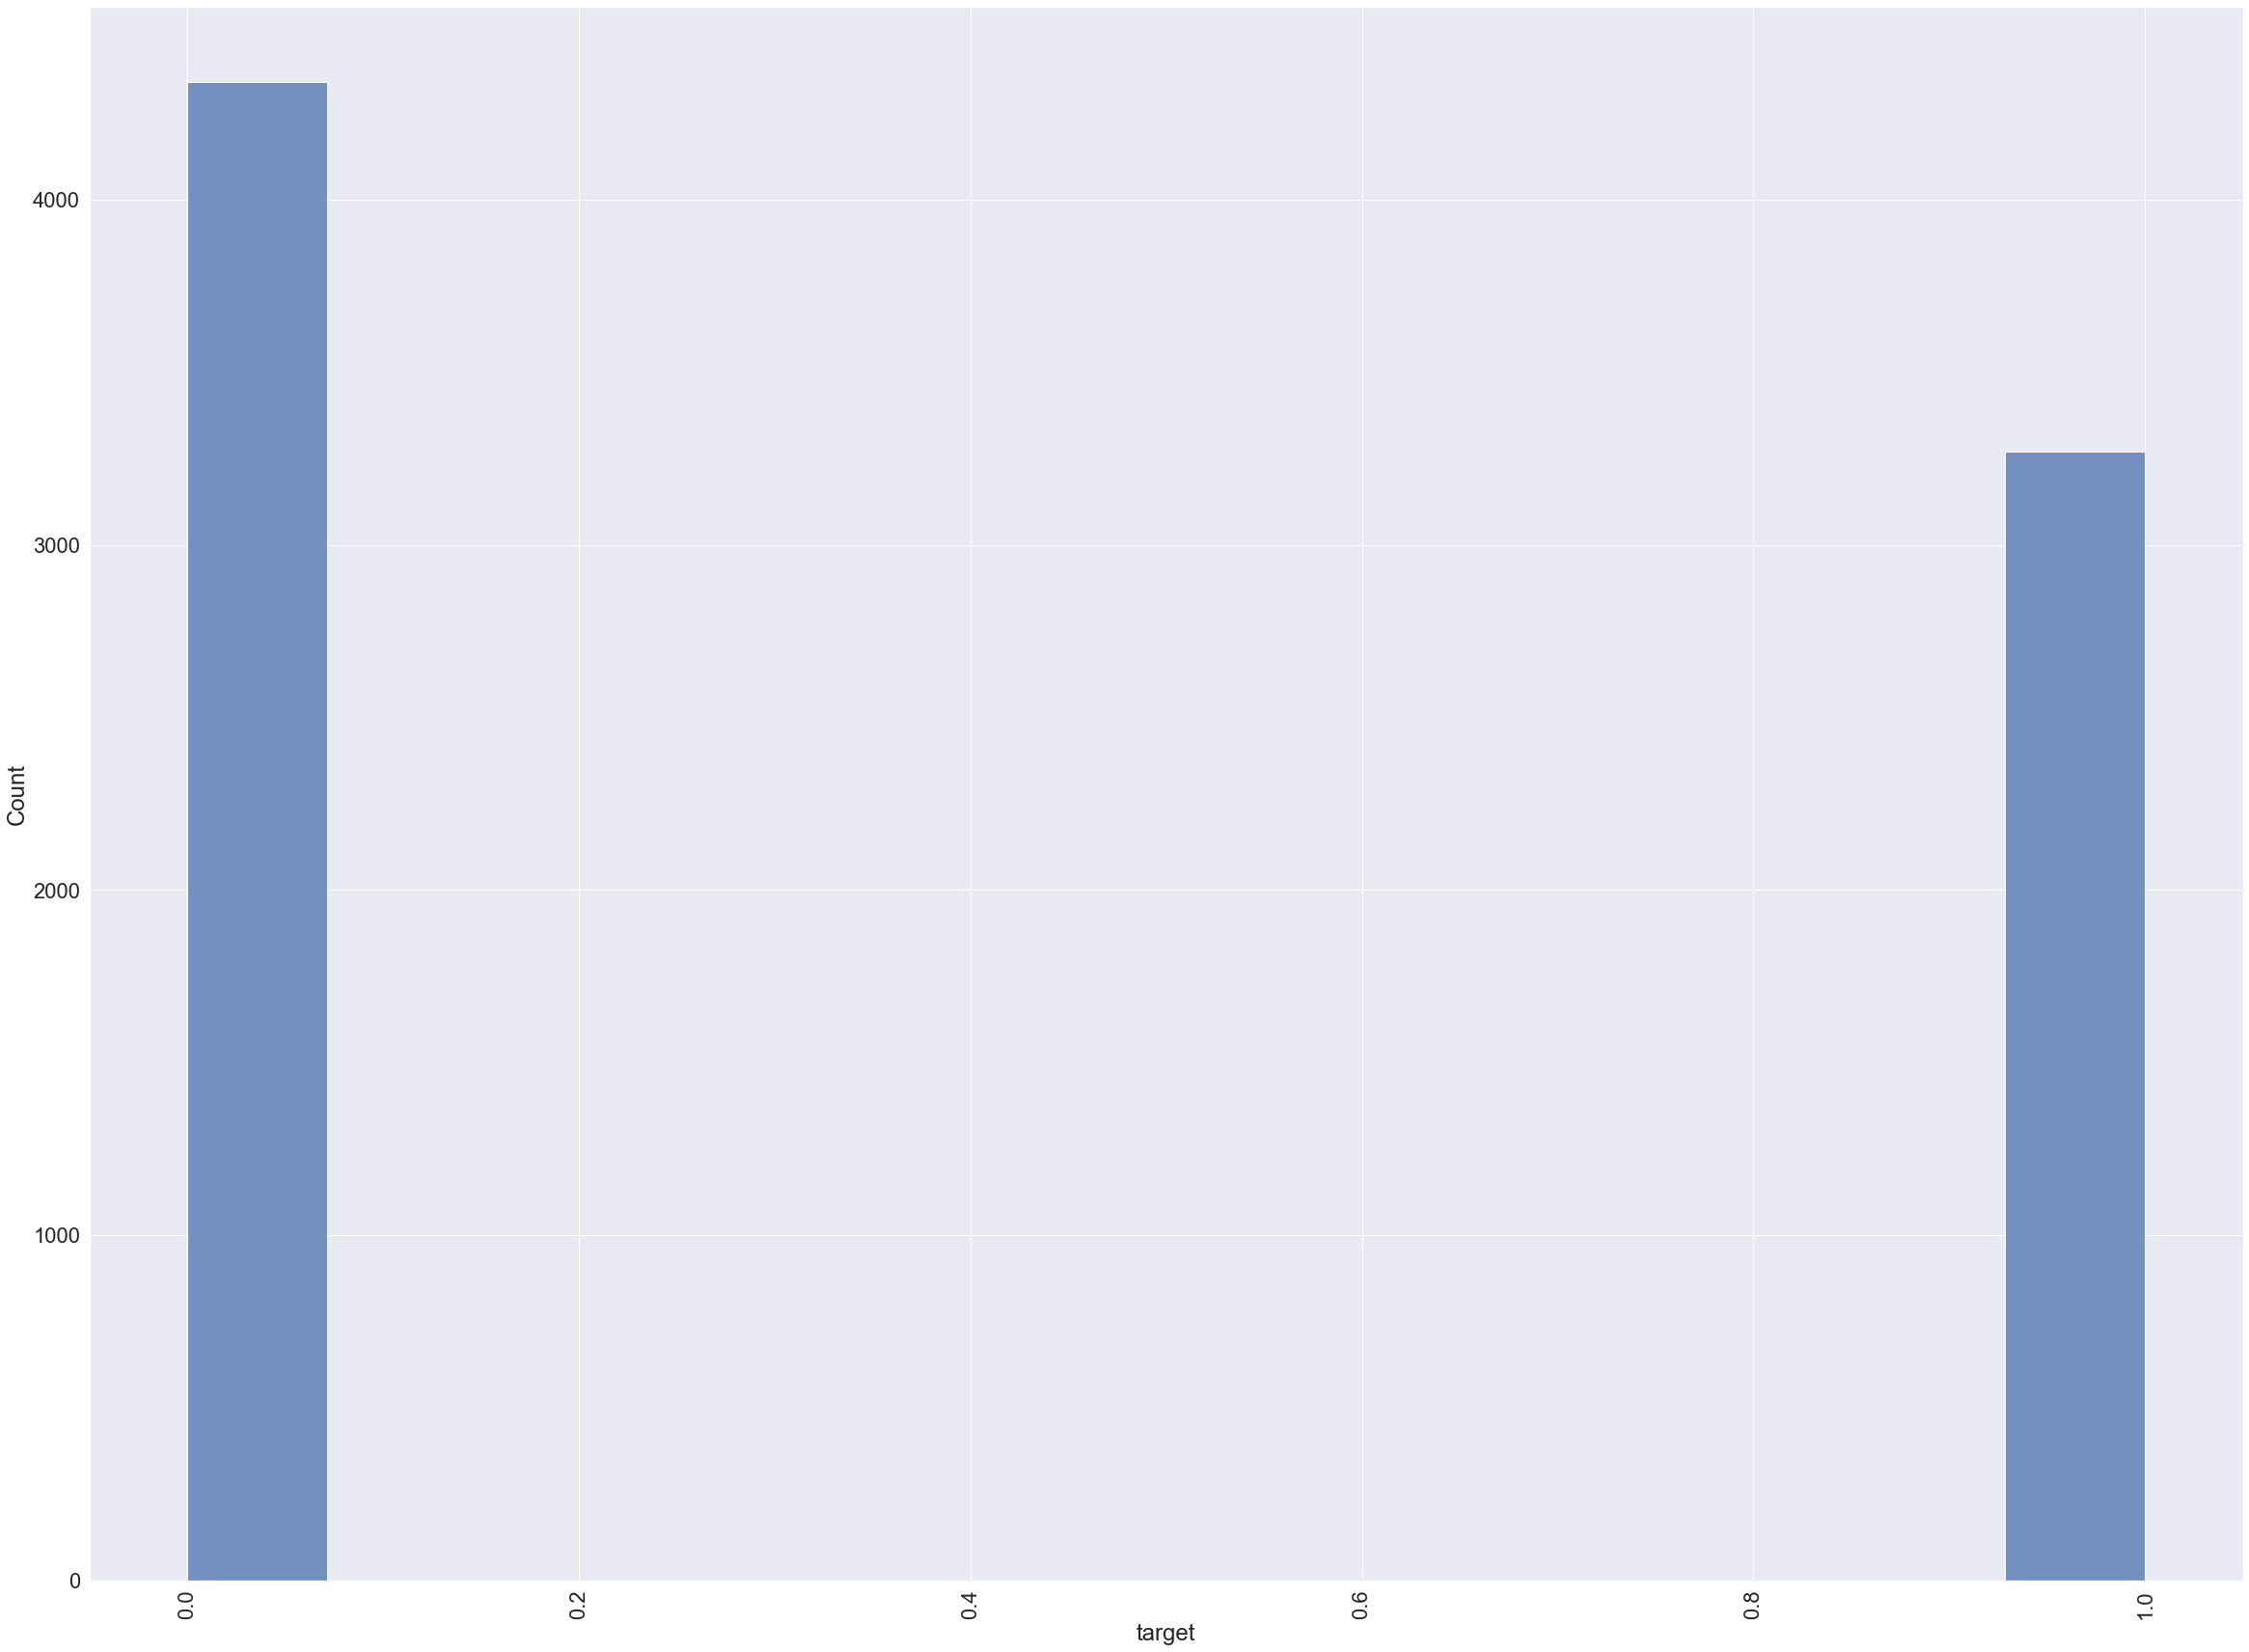

In [11]:
display(Markdown('#### Target Distribution'))

display(data['target'].value_counts())
plt.figure(figsize=(40, 30))
sns.set(font_scale = 2)
sns.histplot(data['target'])
plt.xticks(rotation = 90)
plt.show();

## Word Clouds

In [12]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

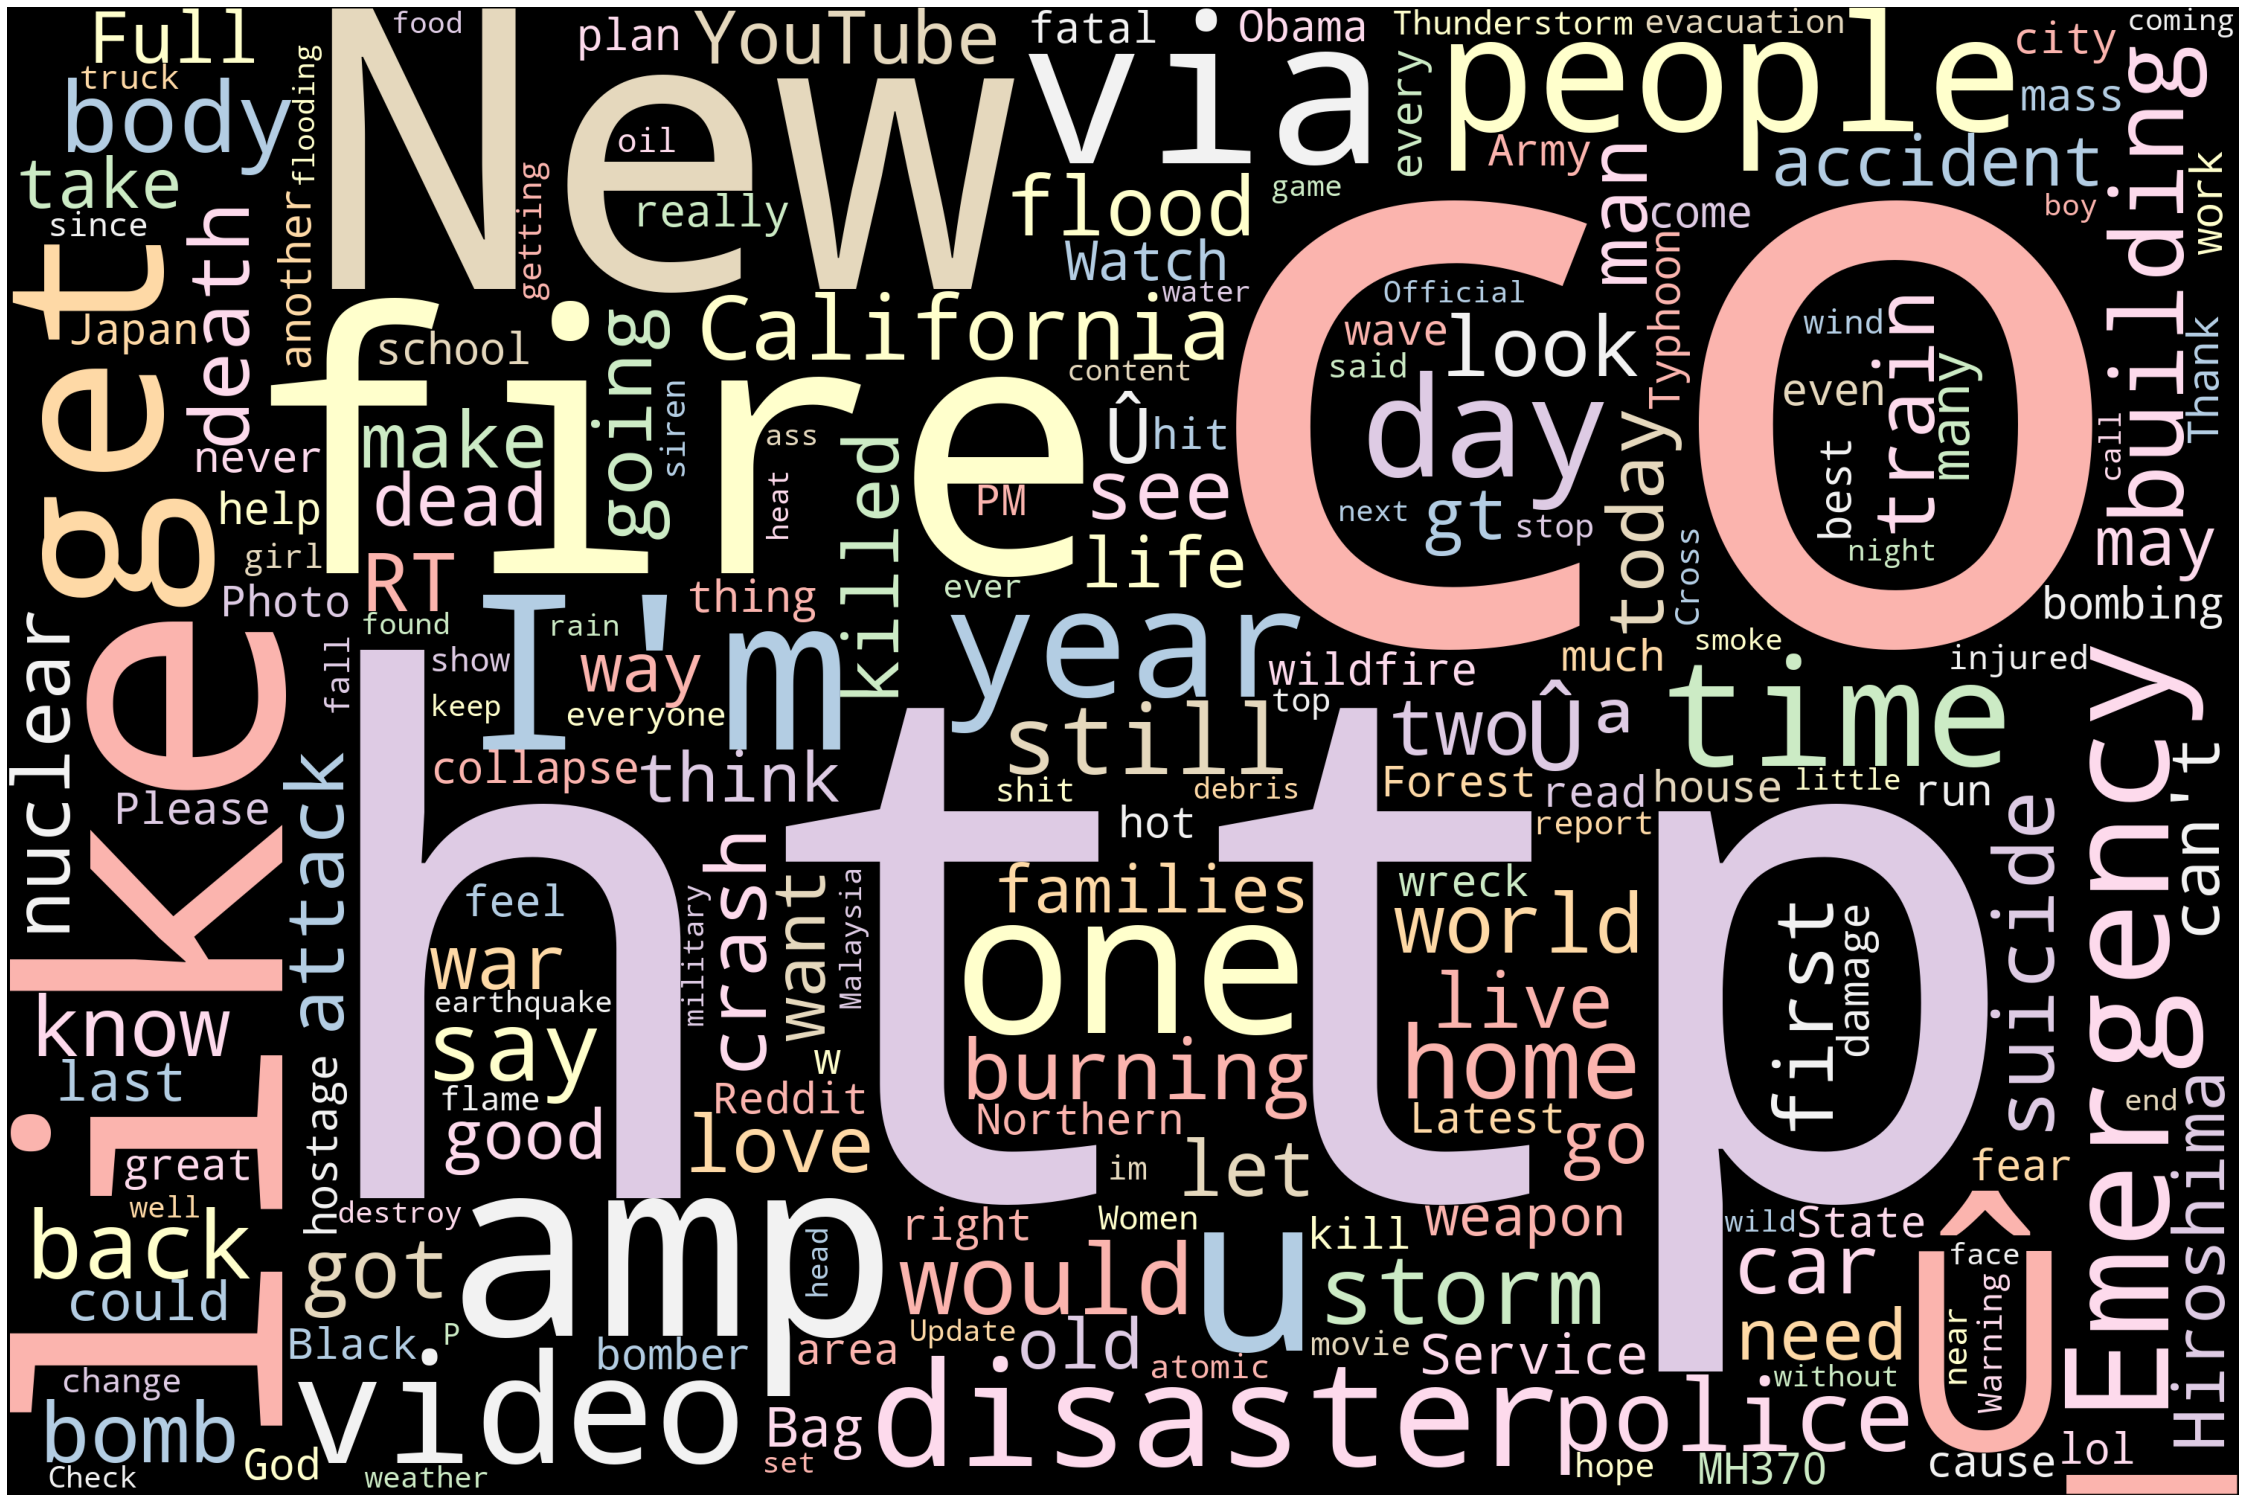

In [13]:
# Generate word cloud
wordcloud = WordCloud(width = 3000, 
                      height = 2000, 
                      random_state=1, 
                      # background_color='salmon', 
                      colormap='Pastel1', 
                      collocations=False, 
                      stopwords = STOPWORDS).generate(' '.join(data['text'].values))
# Plot
plot_cloud(wordcloud)

## Most Common Word Frequencies

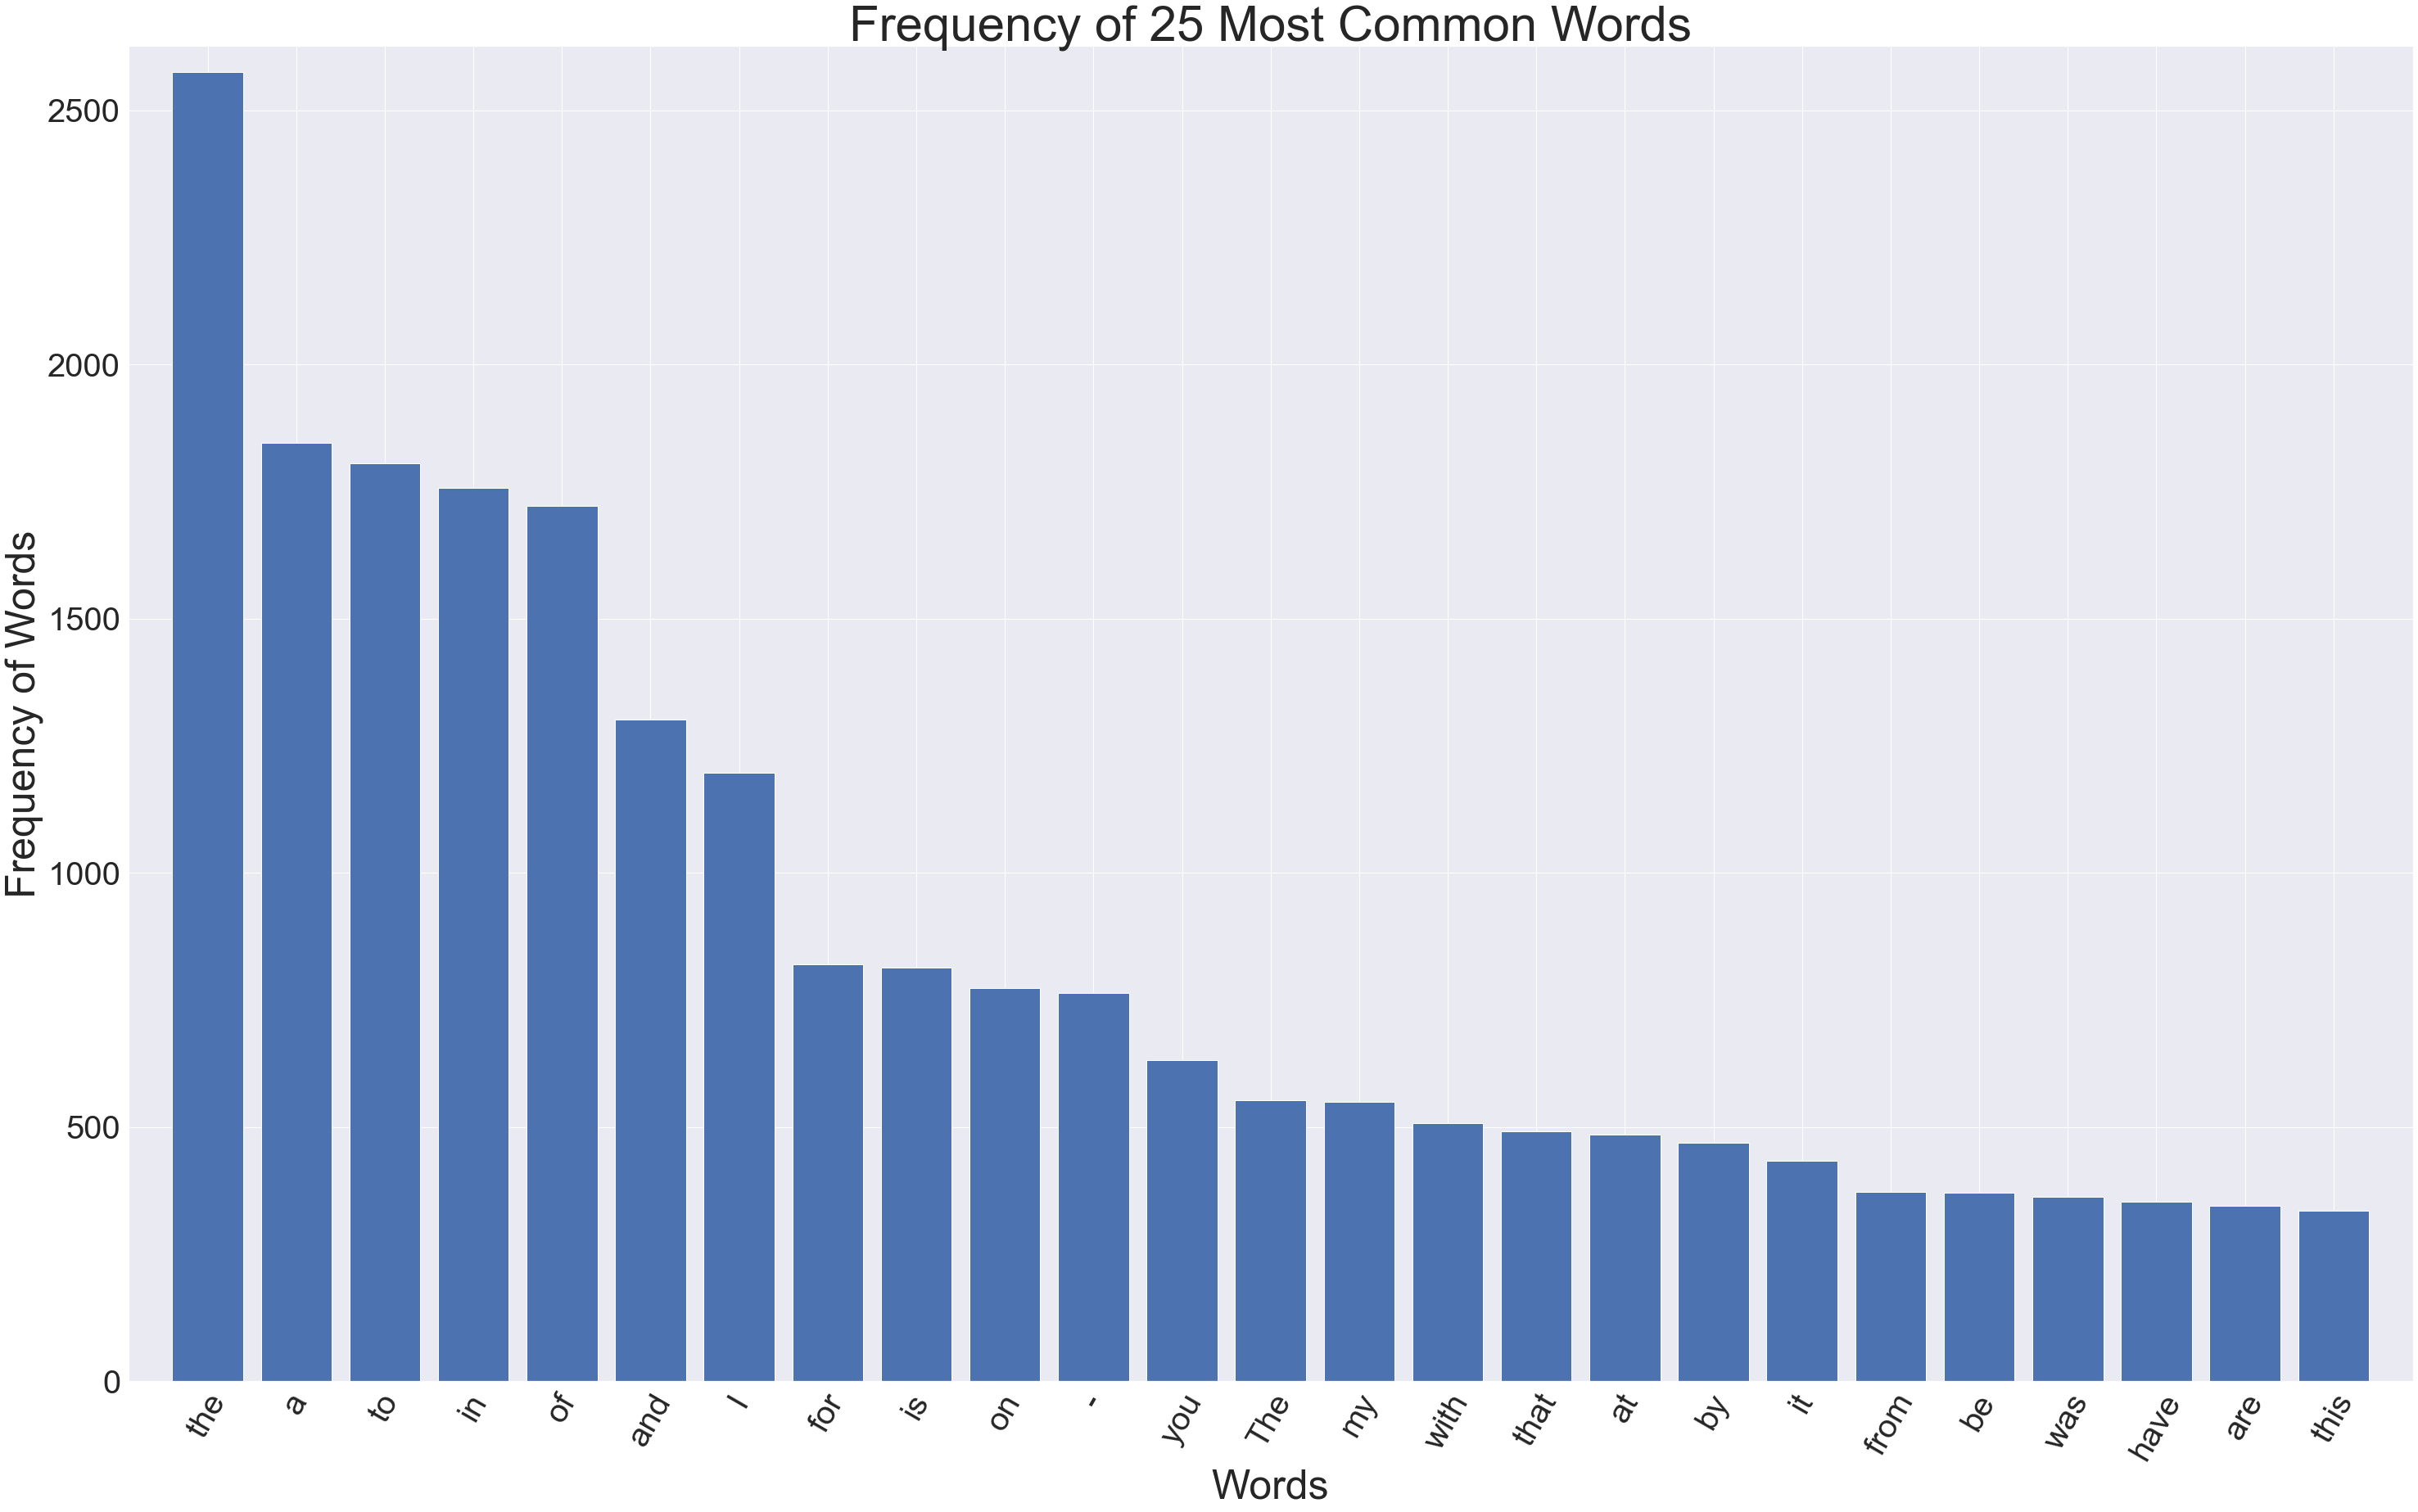

In [17]:
display(Markdown('#### Overall Most Common'))

allwords = []
for wordlist in data['text']:
    allwords += wordlist.split()

mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

#### Target=1 Most Common

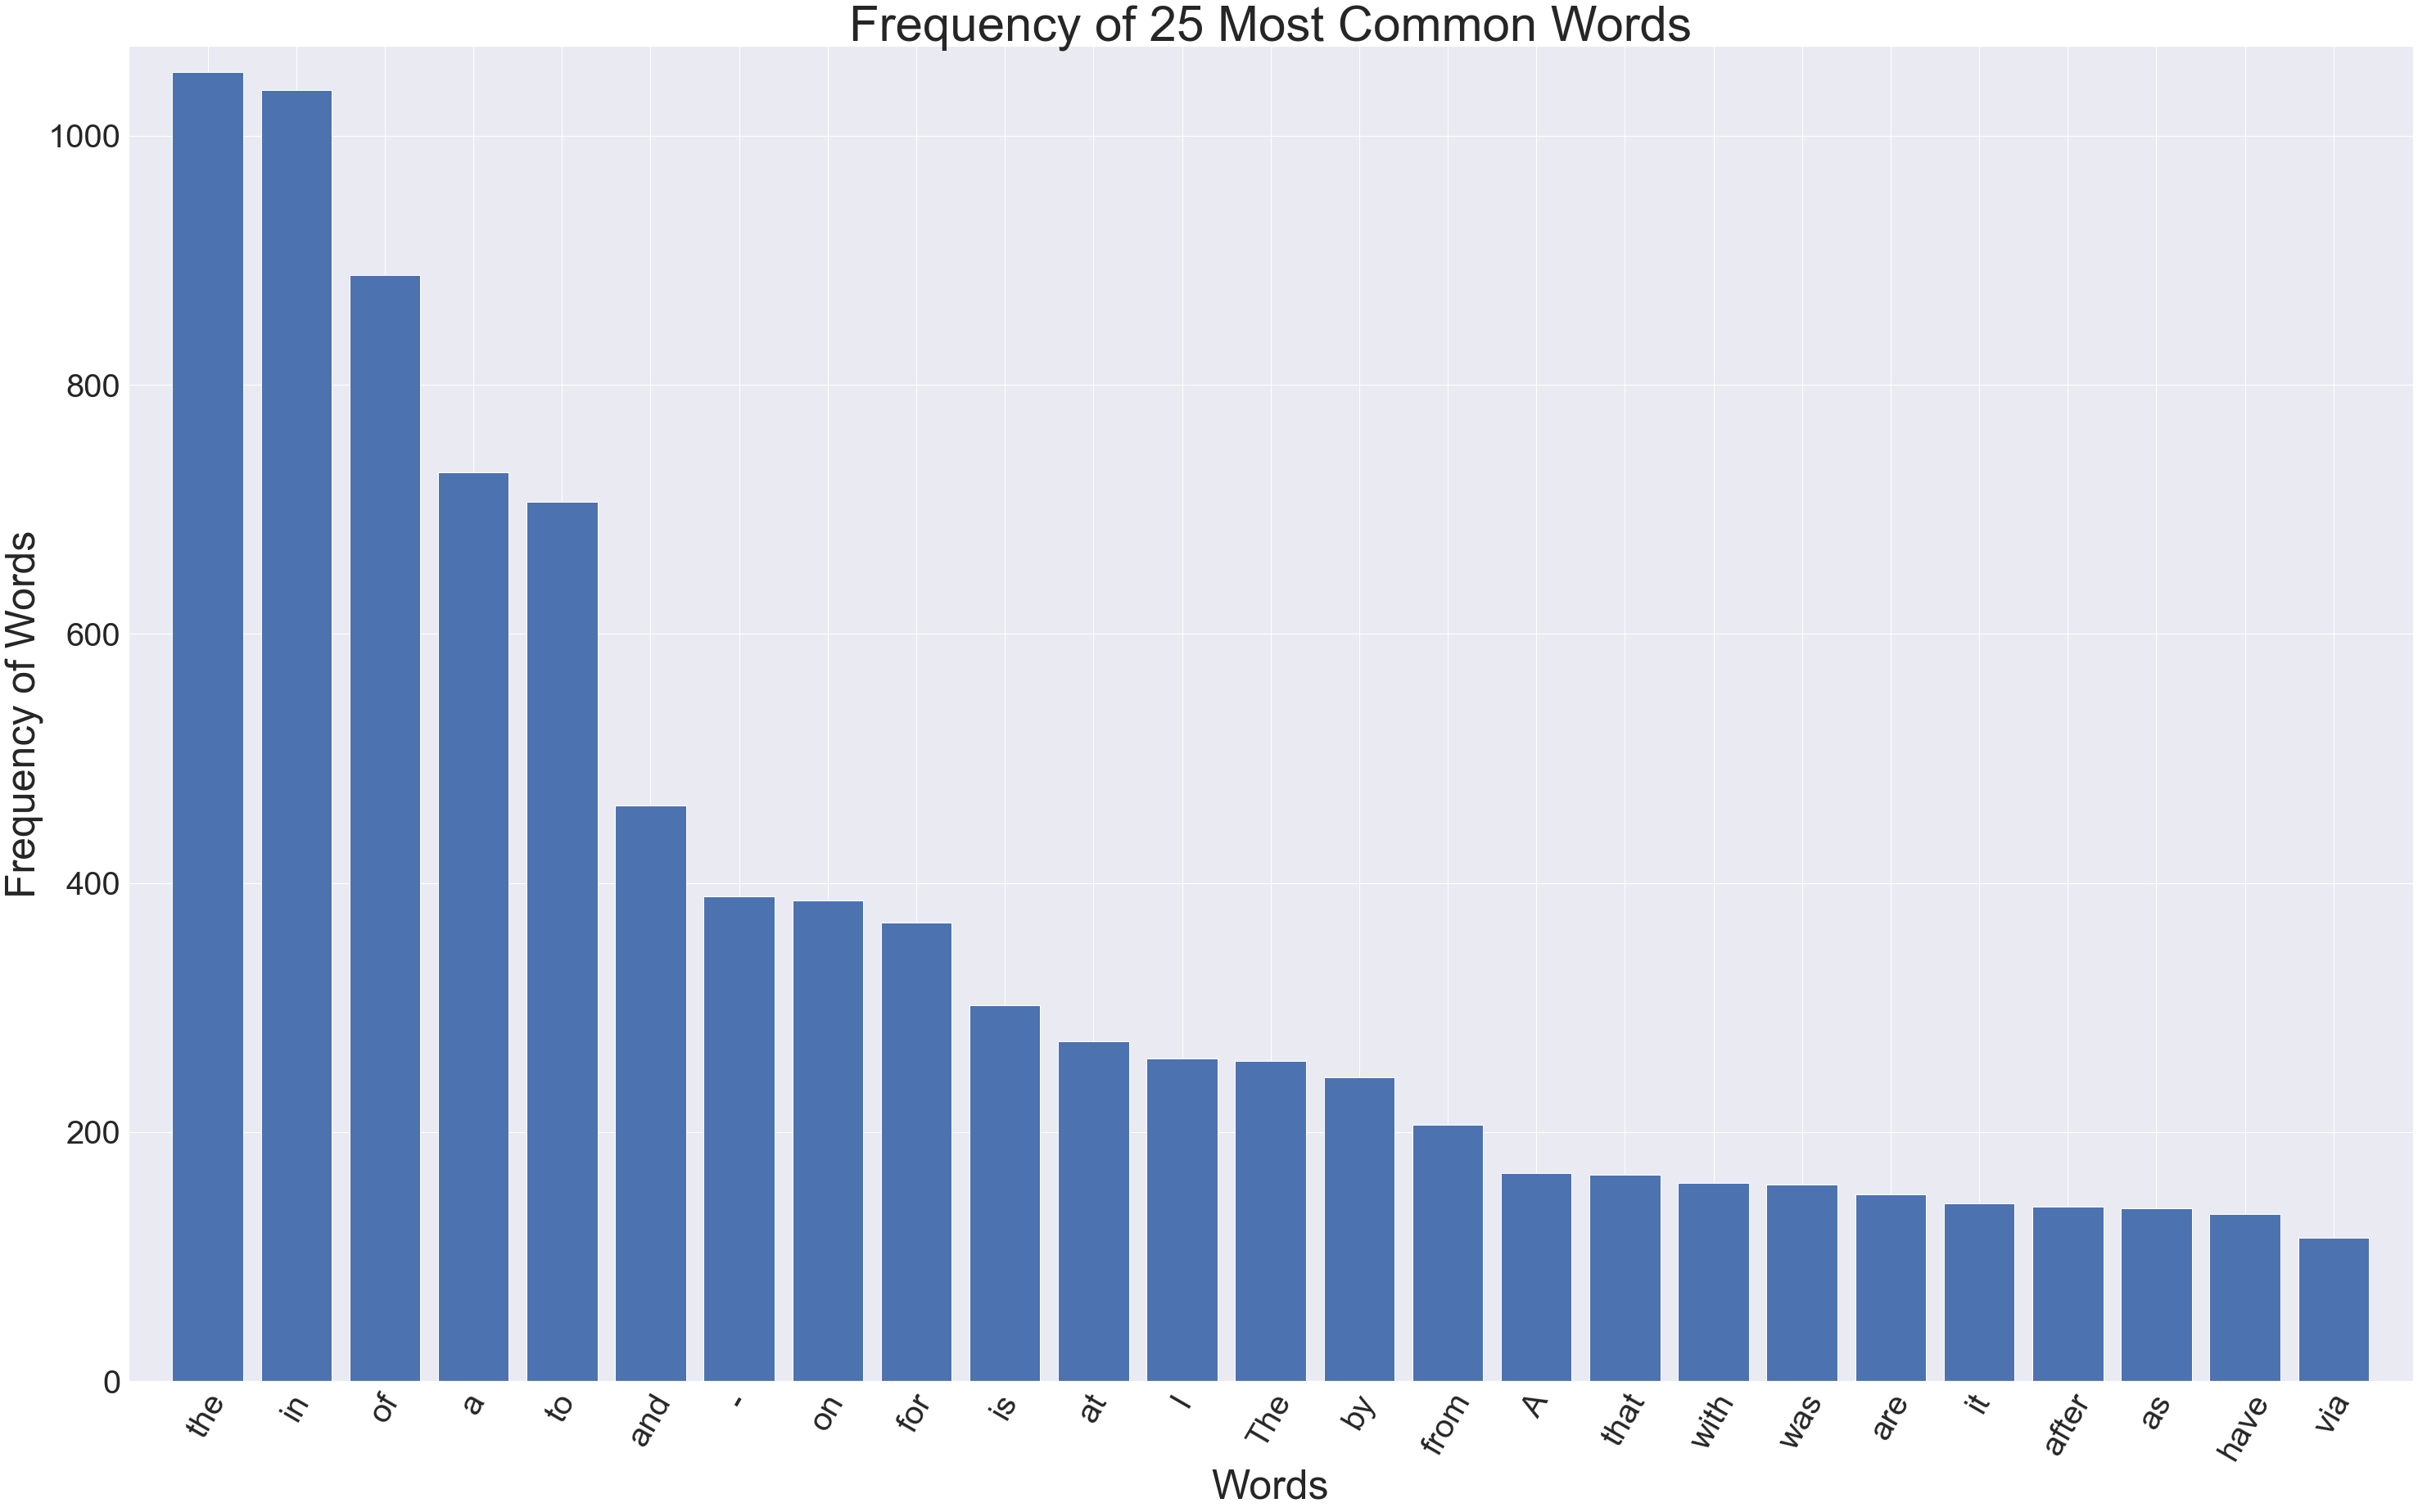

In [18]:
display(Markdown('#### Target = 1 Most Common'))

allwords = []
for wordlist in data[data.target == 1]['text']:
    allwords += wordlist.split()

mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

#### Target = 0 Most Common

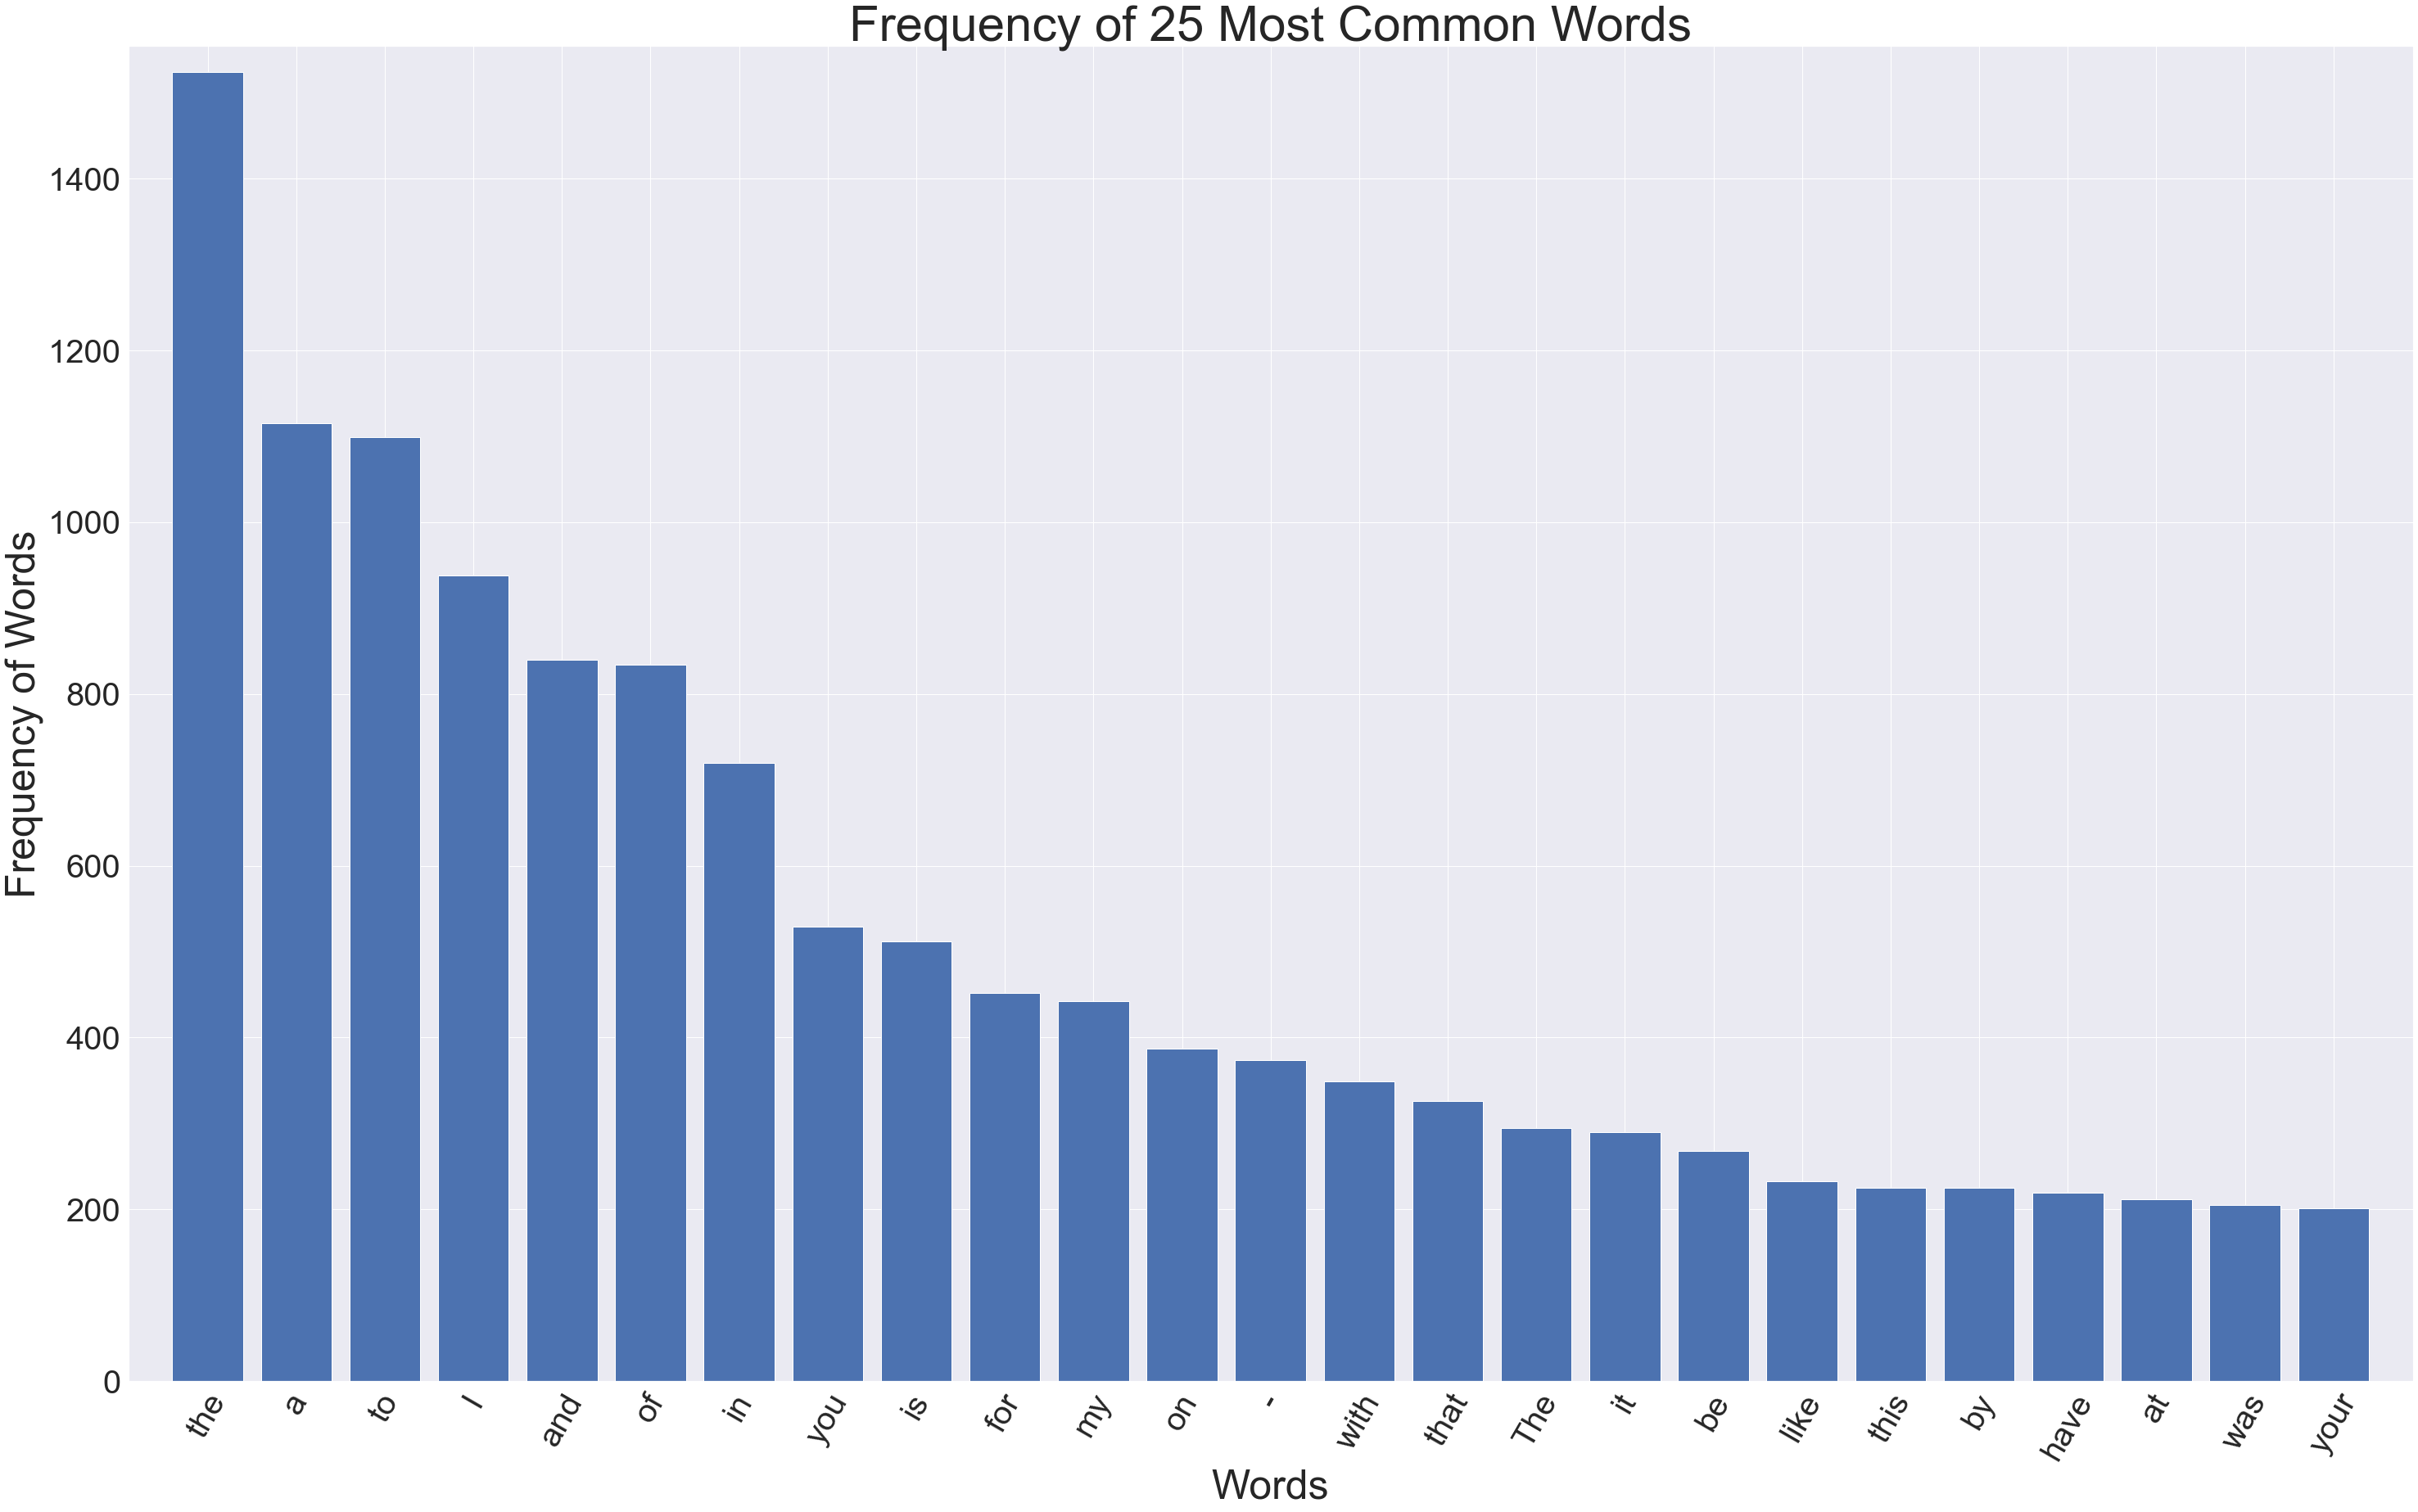

In [19]:
display(Markdown('#### Target = 0 Most Common'))

allwords = []
for wordlist in data[data.target == 0]['text']:
    allwords += wordlist.split()

mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

#### TODO:

- Look up more of the standard visualisation techniques and EDA for text datasets